## Hate Crimes Main Database

## EDA

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scipy.stats as stats

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
file_path = '/Users/sayo/personal_projects/Usafe_bot/data/hate_crimes.csv'  
df = pd.read_csv(file_path)

df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description
0,2016-11,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,A man visibly identifiable as Jewish was pushe...
1,2016-11,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,A man visibly identifiable as Jewish was chase...
2,2016-03,Belgium,Anti-Semitic hate crime,Violent attacks against people,"Anti-Defamation League (ADL), Antisemitisme.be",Stones were thrown at people visibly identifia...
3,2016-03,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,Stones were thrown at people visibly identifia...
4,2016-11,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,Firecrackers were thrown at people visibly ide...


In [4]:
df.columns

Index(['Date', 'Country', 'Bias motivations', 'Type of incident', 'Source',
       'Description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27417 entries, 0 to 27416
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              27417 non-null  object
 1   Country           27417 non-null  object
 2   Bias motivations  27417 non-null  object
 3   Type of incident  27417 non-null  object
 4   Source            27417 non-null  object
 5   Description       24355 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [6]:
df.describe()

,Date,Country,Bias motivations,Type of incident,Source,Description
count,27417,27417,27417,27417,27417,24355
unique,105,53,69,6,605,21880
top,2023-12,United States of America,Racist and xenophobic hate crime,Attacks against property,Anti-Defamation League (ADL),Members of the Jewish community were threatene...
freq,1046,7058,6307,12073,6488,627


In [7]:
# Number of unique bias motivations
num_bias_motivations = df['Bias motivations'].nunique()
print(f"Number of unique bias motivations: {num_bias_motivations}")

# Number of unique countries
num_countries = df['Country'].nunique()
print(f"Number of unique countries: {num_countries}")

# Number of different sources
num_sources = df['Source'].nunique()
print(f"Number of different sources: {num_sources}")

Number of unique bias motivations: 69
Number of unique countries: 53
Number of different sources: 605


In [8]:
# Number of rows where the country is Germany
num_rows_germany = df[df['Country'] == 'Germany'].shape[0]
print(f"Number of rows for Germany: {num_rows_germany}")

Number of rows for Germany: 2028


In [9]:
# filter the dataframe to show rows where Germany get the counts of each bias motivation
bias_motivations_germany_counts = df[df['Country'] == 'Germany']['Bias motivations'].value_counts()

print("Bias motivations for Germany and their counts:")
print(bias_motivations_germany_counts)

Bias motivations for Germany and their counts:
Bias motivations
Anti-Christian hate crime                                                                                                   814
Anti-Muslim hate crime                                                                                                      386
Anti-LGBTI hate crime                                                                                                       235
Anti-Semitic hate crime                                                                                                     212
Racist and xenophobic hate crime                                                                                            200
Racist and xenophobic hate crime, Anti-Muslim hate crime                                                                     92
Gender-based hate crime, Anti-LGBTI hate crime                                                                               15
Racist and xenophobic hate crime, Anti-S

In [10]:
# Find the most common bias motivation for each country
most_common_bias_per_country = df.groupby('Country')['Bias motivations'].agg(lambda x: x.value_counts().idxmax())

print("Most common bias motivation for each country:")
print(most_common_bias_per_country)

Most common bias motivation for each country:
Country
Albania                     Gender-based hate crime, Anti-LGBTI hate crime
Armenia                                              Anti-LGBTI hate crime
Austria                                             Anti-Muslim hate crime
Azerbaijan                                           Anti-LGBTI hate crime
Belarus                                              Anti-LGBTI hate crime
Belgium                                          Anti-Christian hate crime
Bosnia and Herzegovina                    Racist and xenophobic hate crime
Bulgaria                                            Anti-Muslim hate crime
Canada                                             Anti-Semitic hate crime
Croatia                                   Racist and xenophobic hate crime
Cyprus                                    Racist and xenophobic hate crime
Czech Republic                            Racist and xenophobic hate crime
Denmark                                       

In [11]:
# Count the top 10 most common bias motivations
top_10_bias_motivations = df['Bias motivations'].value_counts().head(30)

print("Top 10 most common bias motivations:")
print(top_10_bias_motivations)

Top 10 most common bias motivations:
Bias motivations
Racist and xenophobic hate crime                                                     6307
Anti-Semitic hate crime                                                              6070
Anti-Christian hate crime                                                            5075
Anti-LGBTI hate crime                                                                4521
Anti-Muslim hate crime                                                               2188
Racist and xenophobic hate crime, Anti-Muslim hate crime                              696
Gender-based hate crime, Anti-LGBTI hate crime                                        560
Racist and xenophobic hate crime, Anti-Semitic hate crime                             356
Anti-Roma hate crime                                                                  348
Gender-based hate crime                                                               286
Racist and xenophobic hate crime, Anti-Christi

In [12]:

countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Belgium', 'Austria', 'Switzerland', 'Netherlands', 'Denmark']

filtered_df = df[df['Country'].isin(countries_of_interest)]

# most common bias motivation for each of main euro countries
most_common_bias_selected_countries = (
    filtered_df.groupby('Country')['Bias motivations']
    .agg(lambda x: x.value_counts().idxmax())
)

print("Most reported bias motivation for each specified country:")
print(most_common_bias_selected_countries)

Most reported bias motivation for each specified country:
Country
Austria                  Anti-Muslim hate crime
Belgium               Anti-Christian hate crime
Denmark                 Anti-Semitic hate crime
France                Anti-Christian hate crime
Germany               Anti-Christian hate crime
Italy          Racist and xenophobic hate crime
Netherlands             Anti-Semitic hate crime
Portugal                  Anti-LGBTI hate crime
Spain                 Anti-Christian hate crime
Switzerland    Racist and xenophobic hate crime
Name: Bias motivations, dtype: object


In [13]:

anti_christian_germany_df = df[(df['Country'] == 'Germany') & (df['Bias motivations'] == 'Anti-Christian hate crime')]

anti_christian_descriptions = anti_christian_germany_df['Description'].head(10)
print("Anti-Christian hate crimes in Germany:")
print(anti_christian_descriptions)

Anti-Christian hate crimes in Germany:
933    A male refugee was subjected to death threats ...
940    The baby of an Eritrean Christian woman was su...
952    A male Christian refugee was stabbed in the ba...
964    Assyrian refugees were threatened in their ref...
975    A Lutheran refugee was physically assaulted an...
980    Six Christian refugees were threatened by a la...
983    A Catholic monument was vandalized with pink p...
985    A Christian academy was vandalized with paint ...
990    A religious statue was removed from a Catholic...
994    A religious statue was damaged twice within a ...
Name: Description, dtype: object


In [14]:
df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description
0,2016-11,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,A man visibly identifiable as Jewish was pushe...
1,2016-11,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,A man visibly identifiable as Jewish was chase...
2,2016-03,Belgium,Anti-Semitic hate crime,Violent attacks against people,"Anti-Defamation League (ADL), Antisemitisme.be",Stones were thrown at people visibly identifia...
3,2016-03,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,Stones were thrown at people visibly identifia...
4,2016-11,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,Firecrackers were thrown at people visibly ide...


# Things important to consider 
1/ i need to check if the anti christian hate crimes were perpetrated against non white ppl 




In [15]:
num_types_of_incidents = df['Type of incident'].nunique()
print(f"Number of unique types of incidents: {num_types_of_incidents}")

Number of unique types of incidents: 6


In [16]:
type_of_incidents = df['Type of incident'].unique()
print("List of types of incidents:")
print(type_of_incidents)

List of types of incidents:
['Violent attacks against people' 'Threats' 'Attacks against property'
 'Threats, Violent attacks against people'
 'Attacks against property, Violent attacks against people'
 'Attacks against property, Threats']


In [17]:
# Filter the dataframe for incidents of type 'Violent attacks against people'
violent_attacks_df = df[df['Type of incident'] == 'Violent attacks against people']

# Count the occurrences for each country
violent_attacks_per_country = violent_attacks_df['Country'].value_counts()

# Find the country with the most number of violent attacks against people
most_violent_attacks_country = violent_attacks_per_country.idxmax()
most_violent_attacks_count = violent_attacks_per_country.max()

print(f"The country with the most number of violent attacks against people is {most_violent_attacks_country} with {most_violent_attacks_count} incidents.")

The country with the most number of violent attacks against people is Russian Federation with 940 incidents.


In [18]:
# Filter the dataframe for incidents of type 'Violent attacks against people'
violent_attacks_df = df[df['Type of incident'] == 'Violent attacks against people']

# Filter for the specified countries
countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Belgium', 'Austria', 'Switzerland', 'Netherlands']
violent_attacks_df = violent_attacks_df[violent_attacks_df['Country'].isin(countries_of_interest)]

# Count the occurrences of violent attacks for each specified country
violent_attacks_per_country = violent_attacks_df['Country'].value_counts()

print("Number of violent attacks against people per country:")
print(violent_attacks_per_country)

Number of violent attacks against people per country:
Country
Italy          681
Germany        543
Spain          441
Austria        327
Switzerland    237
France         220
Netherlands     83
Belgium         70
Portugal        32
Name: count, dtype: int64


In [19]:
# Filter the dataframe for incidents of type 'Threats'
threats_df = df[df['Type of incident'] == 'Threats']

# Filter for the specified countries
countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Belgium', 'Austria', 'Switzerland', 'Netherlands']
threats_df = threats_df[threats_df['Country'].isin(countries_of_interest)]

# Count the occurrences of threats for each specified country
threats_per_country = threats_df['Country'].value_counts()

print("Number of threats per country:")
print(threats_per_country)

Number of threats per country:
Country
Germany        344
Italy          248
Netherlands    240
Spain          199
Switzerland    141
France         127
Austria        120
Belgium         49
Portugal        26
Name: count, dtype: int64


In [20]:
countries_of_interest = ['France', 'Italy', 'Spain', 'Portugal', 'Germany', 'Belgium', 'Austria', 'Switzerland', 'Netherlands', 'Denmark']
filtered_df = df[df['Country'].isin(countries_of_interest)]
filtered_df.value_counts(['Country'])


Country    
Germany        2028
Italy          1629
France         1405
Spain          1286
Austria         926
Netherlands     567
Switzerland     525
Belgium         230
Portugal         71
Denmark          46
Name: count, dtype: int64

In [21]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month into separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Display the first few rows to verify the changes
df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description,Year,Month
0,2016-11-01,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,A man visibly identifiable as Jewish was pushe...,2016.0,11.0
1,2016-11-01,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,A man visibly identifiable as Jewish was chase...,2016.0,11.0
2,2016-03-01,Belgium,Anti-Semitic hate crime,Violent attacks against people,"Anti-Defamation League (ADL), Antisemitisme.be",Stones were thrown at people visibly identifia...,2016.0,3.0
3,2016-03-01,Belgium,Anti-Semitic hate crime,Violent attacks against people,Antisemitisme.be,Stones were thrown at people visibly identifia...,2016.0,3.0
4,2016-11-01,Belgium,Anti-Semitic hate crime,Threats,Antisemitisme.be,Firecrackers were thrown at people visibly ide...,2016.0,11.0


what i have seen so far :
- i need to check carrefully if the crimes against chrstians are agaisnt refugees or non white if yes i will put it as racist xenophobic
- i wanna keep the ones that are touching someone directly not "something stolen" or "tag"
- i will focus only on Bias motivations :                                                                                                
Anti-Muslim hate crime                                                                                                      
Anti-LGBTI hate crime                                                                                                       
Anti-Semitic hate crime                                                                                                     
Racist and xenophobic hate crime                                                                                            

The rest i will drop 

- still need to think about taking all of those bias and group by for germany and drop other countries 
- check into trends of threats and violent attacks 
- i need to combine incidents too DONE
- also need to combine bias 
- i need to understand a lil bit more the descriptions so i can combine bias


In [22]:
# Count the occurrences of each type of incident
incident_counts = df['Type of incident'].value_counts()

print("Number of each type of incident:")
print(incident_counts)

Number of each type of incident:
Type of incident
Attacks against property                                    12073
Violent attacks against people                               9069
Threats                                                      6269
Threats, Violent attacks against people                         4
Attacks against property, Violent attacks against people        1
Attacks against property, Threats                               1
Name: count, dtype: int64


In [23]:
# Replace specific combined incident types with the desired categories
df['Type of incident'] = df['Type of incident'].replace({
    'Attacks against property, Threats': 'Attacks against property',
    'Threats, Violent attacks against people': 'Violent attacks against people',
    'Attacks against property, Violent attacks against people': 'Violent attacks against people'
})

# Count the occurrences of each type of incident after the replacements
incident_counts = df['Type of incident'].value_counts()

print("Number of each type of incident:")
print(incident_counts)

Number of each type of incident:
Type of incident
Attacks against property          12074
Violent attacks against people     9074
Threats                            6269
Name: count, dtype: int64


In [24]:
# Filter the dataframe for incidents of type 'Violent attacks against people'
violent_attacks_df = df[df['Type of incident'] == 'Violent attacks against people']

# Count the occurrences of each bias motivation for violent attacks
violent_attacks_bias_counts = violent_attacks_df['Bias motivations'].value_counts()

print("Number of violent attacks against people related to each bias motivation:")
print(violent_attacks_bias_counts)

Number of violent attacks against people related to each bias motivation:
Bias motivations
Anti-LGBTI hate crime                                                                                      3060
Racist and xenophobic hate crime                                                                           2537
Anti-Semitic hate crime                                                                                     739
Anti-Muslim hate crime                                                                                      666
Anti-Christian hate crime                                                                                   548
Gender-based hate crime, Anti-LGBTI hate crime                                                              357
Racist and xenophobic hate crime, Anti-Muslim hate crime                                                    283
Gender-based hate crime                                                                                     203
Anti-Roma hat

In [25]:
# Define the religious hate crimes to be combined
religious_hate_crimes = [
    'Anti-Christian hate crime', 
    'Anti-Muslim hate crime', 
    'Anti-Semitic hate crime', 
    'Other hate crime based on religion or belief'
]

# Update the 'Bias motivations' column to combine religious hate crimes
df['Bias motivations'] = df['Bias motivations'].replace(religious_hate_crimes, 'Religious hate crime')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                                                                                            13367
Racist and xenophobic hate crime                                                                                 6307
Anti-LGBTI hate crime                                                                                            4521
Racist and xenophobic hate crime, Anti-Muslim hate crime                                                          696
Gender-based hate crime, Anti-LGBTI hate crime                                                                    560
                                                                                                                ...  
Racist and xenophobic hate crime, Anti-Roma hate crime, Anti-Muslim hate crime                                      1
Other hate crime based on religion or belief, Gender-based hate crime, Anti-LGBTI hate crime                        1
Rac

In [26]:
# Define the gender-based and anti-LGBTI hate crimes to be combined
gender_and_lgbti_hate_crimes = [
    'Gender-based hate crime', 
    'Anti-LGBTI hate crime',
    'Gender-based hate crime; Anti-LGBTI hate crime'
]

# Update the 'Bias motivations' column to combine gender-based and anti-LGBTI hate crimes
df['Bias motivations'] = df['Bias motivations'].replace(gender_and_lgbti_hate_crimes, 'Gender and Anti-LGBTI hate crime')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                                                                                            13367
Racist and xenophobic hate crime                                                                                 6307
Gender and Anti-LGBTI hate crime                                                                                 4807
Racist and xenophobic hate crime, Anti-Muslim hate crime                                                          696
Gender-based hate crime, Anti-LGBTI hate crime                                                                    560
                                                                                                                ...  
Racist and xenophobic hate crime, Anti-Roma hate crime, Anti-Muslim hate crime                                      1
Other hate crime based on religion or belief, Gender-based hate crime, Anti-LGBTI hate crime                        1
Rac

In [27]:
# Filter out bias motivations that count less than 10 time
filtered_bias_counts = df['Bias motivations'].value_counts()
bias_to_keep = filtered_bias_counts[filtered_bias_counts > 10].index

# Update the dataframe to keep only the rows with the specified bias motivations
df = df[df['Bias motivations'].isin(bias_to_keep)]

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                                                                 13367
Racist and xenophobic hate crime                                                      6307
Gender and Anti-LGBTI hate crime                                                      4807
Racist and xenophobic hate crime, Anti-Muslim hate crime                               696
Gender-based hate crime, Anti-LGBTI hate crime                                         560
Racist and xenophobic hate crime, Anti-Semitic hate crime                              356
Anti-Roma hate crime                                                                   348
Racist and xenophobic hate crime, Anti-Christian hate crime                            136
Racist and xenophobic hate crime, Anti-LGBTI hate crime                                131
Racist and xenophobic hate crime, Gender-based hate crime                               87
Disability hate crime                

In [28]:
# Filter the counts for "Racist and xenophobic hate crime" that are less than 62
racist_xenophobic_counts = df[df['Bias motivations'].str.contains('Racist and xenophobic hate crime')]['Bias motivations'].value_counts()
to_combine = racist_xenophobic_counts[racist_xenophobic_counts < 62].index

# Replace the values in the dataframe
df['Bias motivations'] = df['Bias motivations'].replace(to_combine, 'Racist and xenophobic hate crime, Other')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                                           13367
Racist and xenophobic hate crime                                6307
Gender and Anti-LGBTI hate crime                                4807
Racist and xenophobic hate crime, Anti-Muslim hate crime         696
Gender-based hate crime, Anti-LGBTI hate crime                   560
Racist and xenophobic hate crime, Anti-Semitic hate crime        356
Anti-Roma hate crime                                             348
Racist and xenophobic hate crime, Other                          218
Racist and xenophobic hate crime, Anti-Christian hate crime      136
Racist and xenophobic hate crime, Anti-LGBTI hate crime          131
Racist and xenophobic hate crime, Gender-based hate crime         87
Disability hate crime                                             76
Anti-Muslim hate crime, Gender-based hate crime                   62
Anti-Semitic hate crime, Anti-LGBTI hate crime    

In [29]:
# Update the 'Bias motivations' column to categorize everything that starts with "racist" into "Racist and xenophobic hate crime"
df['Bias motivations'] = df['Bias motivations'].replace(
    to_replace=r'^Racist.*', 
    value='Racist and xenophobic hate crime', 
    regex=True
)

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                                  13367
Racist and xenophobic hate crime                       7931
Gender and Anti-LGBTI hate crime                       4807
Gender-based hate crime, Anti-LGBTI hate crime          560
Anti-Roma hate crime                                    348
Disability hate crime                                    76
Anti-Muslim hate crime, Gender-based hate crime          62
Anti-Semitic hate crime, Anti-LGBTI hate crime           52
Anti-Semitic hate crime, Gender-based hate crime         36
Anti-Semitic hate crime, Anti-Christian hate crime       24
Disability hate crime, Anti-LGBTI hate crime             22
Anti-Semitic hate crime, Anti-Muslim hate crime          12
Name: count, dtype: int64


In [30]:
# Update the 'Bias motivations' column to categorize everything that starts with "Anti-Semitic" and "Anti-Muslim" into "religious hate crime"
df['Bias motivations'] = df['Bias motivations'].replace(
    to_replace=r'^Anti-(Semitic|Muslim).*', 
    value='religious hate crime', 
    regex=True
)

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                              13367
Racist and xenophobic hate crime                   7931
Gender and Anti-LGBTI hate crime                   4807
Gender-based hate crime, Anti-LGBTI hate crime      560
Anti-Roma hate crime                                348
religious hate crime                                186
Disability hate crime                                76
Disability hate crime, Anti-LGBTI hate crime         22
Name: count, dtype: int64


In [31]:
# Update the 'Bias motivations' column to categorize "Anti-Roma hate crime" as "Racist and xenophobic hate crime"
df['Bias motivations'] = df['Bias motivations'].replace('Anti-Roma hate crime', 'Racist and xenophobic hate crime')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                              13367
Racist and xenophobic hate crime                   8279
Gender and Anti-LGBTI hate crime                   4807
Gender-based hate crime, Anti-LGBTI hate crime      560
religious hate crime                                186
Disability hate crime                                76
Disability hate crime, Anti-LGBTI hate crime         22
Name: count, dtype: int64


In [32]:
# Define the gender-based and anti-LGBTI hate crimes to be combined
gender_and_lgbti_hate_crimes = [
    'Gender-based hate crime, Anti-LGBTI hate crime'
]

# Update the 'Bias motivations' column to combine gender-based and anti-LGBTI hate crimes
df['Bias motivations'] = df['Bias motivations'].replace(gender_and_lgbti_hate_crimes, 'Gender and Anti-LGBTI hate crime')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                            13367
Racist and xenophobic hate crime                 8279
Gender and Anti-LGBTI hate crime                 5367
religious hate crime                              186
Disability hate crime                              76
Disability hate crime, Anti-LGBTI hate crime       22
Name: count, dtype: int64


In [33]:
# Filter out bias motivations that count less than 76 times
filtered_bias_counts = df['Bias motivations'].value_counts()
bias_to_keep = filtered_bias_counts[filtered_bias_counts > 76].index

# Update the dataframe to keep only the rows with the specified bias motivations
df = df[df['Bias motivations'].isin(bias_to_keep)]

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                13367
Racist and xenophobic hate crime     8279
Gender and Anti-LGBTI hate crime     5367
religious hate crime                  186
Name: count, dtype: int64


In [34]:
num_rows = df.shape[0]
print(f"Number of rows in the dataframe: {num_rows}")

Number of rows in the dataframe: 27199


In [35]:
if 'Bias Combined' in df.columns:
    df = df.drop(columns=['Bias Combined'])

# Display the first few rows to verify the changes
df.head(20)

,Date,Country,Bias motivations,Type of incident,Source,Description,Year,Month
0,2016-11-01,Belgium,Religious hate crime,Violent attacks against people,Antisemitisme.be,A man visibly identifiable as Jewish was pushe...,2016.0,11.0
1,2016-11-01,Belgium,Religious hate crime,Threats,Antisemitisme.be,A man visibly identifiable as Jewish was chase...,2016.0,11.0
2,2016-03-01,Belgium,Religious hate crime,Violent attacks against people,"Anti-Defamation League (ADL), Antisemitisme.be",Stones were thrown at people visibly identifia...,2016.0,3.0
3,2016-03-01,Belgium,Religious hate crime,Violent attacks against people,Antisemitisme.be,Stones were thrown at people visibly identifia...,2016.0,3.0
4,2016-11-01,Belgium,Religious hate crime,Threats,Antisemitisme.be,Firecrackers were thrown at people visibly ide...,2016.0,11.0
5,2016-11-01,Belgium,Religious hate crime,Threats,Antisemitisme.be,Firecrackers were thrown at people visibly ide...,2016.0,11.0
6,2016-01-01,Belgium,religious hate crime,Violent attacks against people,Antisemitisme.be,"A lesbian Jewish woman was assaulted, threaten...",2016.0,1.0
7,2016-12-01,Belgium,Religious hate crime,Attacks against property,Antisemitisme.be,A swastika was spray-painted on the sidewalk i...,2016.0,12.0
8,2016-01-01,Belgium,Religious hate crime,Attacks against property,Antisemitisme.be,Anti-Semitic graffiti were spray-painted on a ...,2016.0,1.0
9,2016-03-01,Belgium,Religious hate crime,Attacks against property,"Anti-Defamation League (ADL), Antisemitisme.be",Anti-Semitic graffiti were spray-painted on a ...,2016.0,3.0


In [36]:
num_incidents_germany = df[df['Country'] == 'Germany'].shape[0]
print(f"Number of incidents in Germany: {num_incidents_germany}")

Number of incidents in Germany: 2021


In [37]:
# Filter the dataframe to keep only the rows where the country is Germany
df = df[df['Country'] == 'Germany']

# Display the first few rows to verify the changes
df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description,Year,Month
756,2016-03-01,Germany,Religious hate crime,Violent attacks against people,Department for Research and Information on Ant...,A group of Spanish tourists was spat at and su...,2016.0,3.0
757,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,Plates commemorating female Jewish students we...,2016.0,4.0
758,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,A sticker denying the Holocaust was left on a ...,2016.0,4.0
759,2016-05-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Four stolpersteine, stones commemorating Holoc...",2016.0,5.0
760,2016-06-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Several stolpersteine, stones commemorating Ho...",2016.0,6.0


In [38]:
# Count the number of incidents by bias
incidents_by_bias = df['Bias motivations'].value_counts()

print("Number of incidents by bias:")
print(incidents_by_bias)

Number of incidents by bias:
Bias motivations
Religious hate crime                1412
Racist and xenophobic hate crime     342
Gender and Anti-LGBTI hate crime     254
religious hate crime                  13
Name: count, dtype: int64


In [39]:
# Update the 'Bias motivations' column to categorize "religious hate crime" under "Religious hate crime"
df['Bias motivations'] = df['Bias motivations'].replace('religious hate crime', 'Religious hate crime')

# Display the updated counts of bias motivations
updated_bias_counts = df['Bias motivations'].value_counts()
print("Updated counts of bias motivations:")
print(updated_bias_counts)

Updated counts of bias motivations:
Bias motivations
Religious hate crime                1425
Racist and xenophobic hate crime     342
Gender and Anti-LGBTI hate crime     254
Name: count, dtype: int64


In [40]:
# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')

# Display the first few rows to verify the changes
df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description,Year,Month
756,2016-03-01,Germany,Religious hate crime,Violent attacks against people,Department for Research and Information on Ant...,A group of Spanish tourists was spat at and su...,2016,3
757,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,Plates commemorating female Jewish students we...,2016,4
758,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,A sticker denying the Holocaust was left on a ...,2016,4
759,2016-05-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Four stolpersteine, stones commemorating Holoc...",2016,5
760,2016-06-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Several stolpersteine, stones commemorating Ho...",2016,6


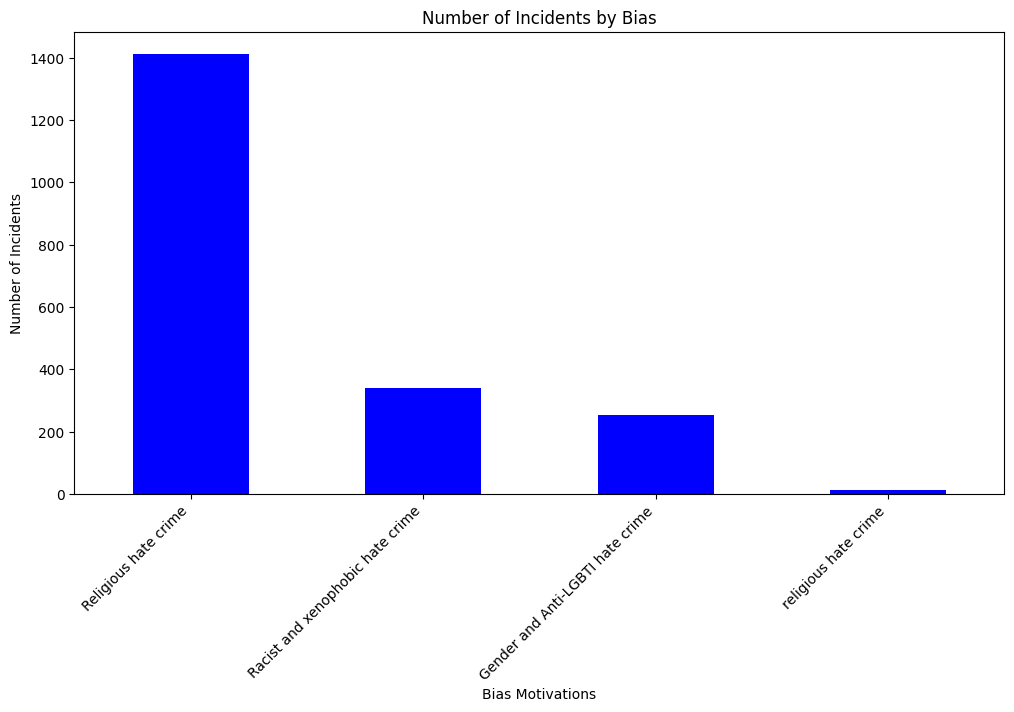

In [41]:
# Plot the number of incidents by bias
incidents_by_bias.plot(kind='bar', figsize=(12, 6), color='blue')

# Add title and labels
plt.title('Number of Incidents by Bias')
plt.xlabel('Bias Motivations')
plt.ylabel('Number of Incidents')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

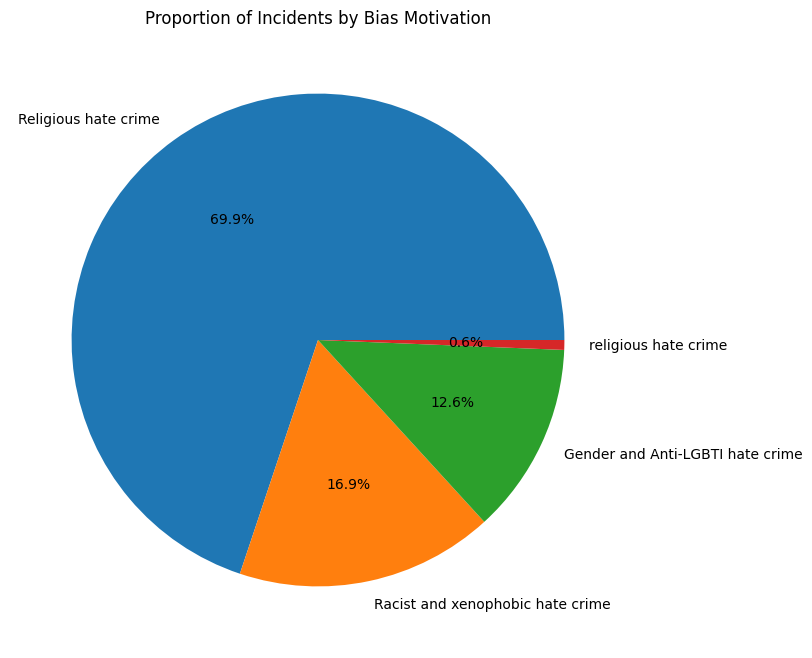

In [42]:
incidents_by_bias.plot(kind='pie', y='Number of Incidents', autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Proportion of Incidents by Bias Motivation')
plt.ylabel('')  # Hide y-label
plt.show()

In [43]:
# Group by year and bias motivations, then count the occurrences
bias_per_year = df.groupby(['Year', 'Bias motivations']).size().unstack(fill_value=0)

# Calculate the percentage of each bias per year
bias_per_year_percentage = bias_per_year.div(bias_per_year.sum(axis=1), axis=0) * 100

# Display the percentage of each bias per year
print(bias_per_year_percentage)

Bias motivations  Gender and Anti-LGBTI hate crime   
Year                                                 
2010                                      0.000000  \
2016                                     19.540230   
2017                                     13.375796   
2018                                     16.666667   
2019                                     10.526316   
2020                                      8.333333   
2021                                     13.942308   
2022                                     11.494253   
2023                                     12.820513   

Bias motivations  Racist and xenophobic hate crime  Religious hate crime  
Year                                                                      
2010                                      0.000000            100.000000  
2016                                      4.022989             76.436782  
2017                                      6.369427             80.254777  
2018                          

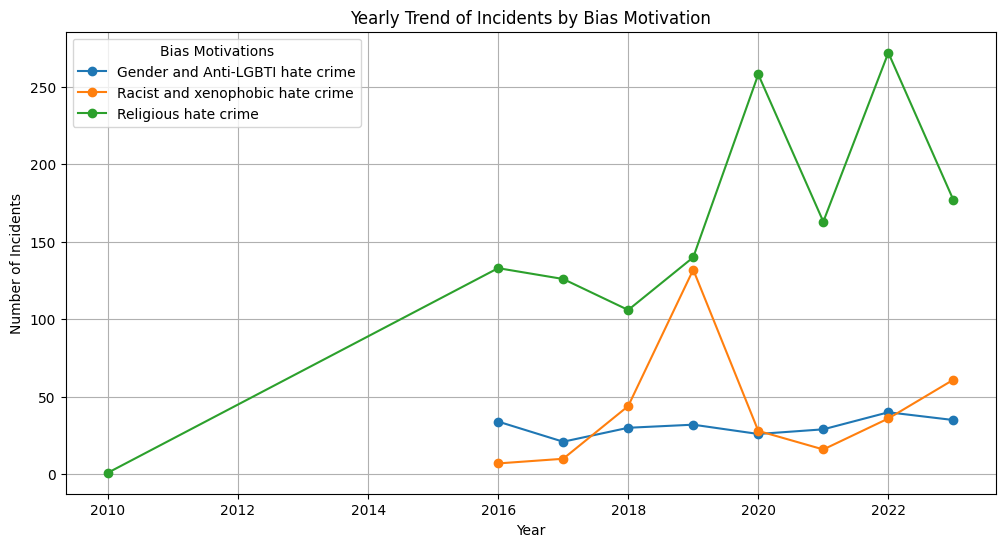

In [44]:
# Group by Year and Bias Motivation to get the yearly counts for each bias
yearly_trends = df.groupby(['Year', 'Bias motivations']).size().unstack()

# Plotting the trends
yearly_trends.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Yearly Trend of Incidents by Bias Motivation')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Bias Motivations')
plt.grid(True)
plt.show()

give an explanation of what happened in the world during this time : politcal situation, laws, covid? 

In [18]:
# Filter the dataframe for anti-Christian hate crimes
anti_christian_df = df[df['Bias motivations'] == 'Anti-Christian hate crime']

# Define the keywords to search for
keywords = ['immigrants', 'black', 'muslim']

# Check for the presence of keywords in the descriptions
for keyword in keywords:
    keyword_present = anti_christian_df['Description'].str.contains(keyword, case=False, na=False)
    count = keyword_present.sum()
    print(f"Number of descriptions containing the keyword '{keyword}': {count}")

    # Display the descriptions containing the keyword
    descriptions_with_keyword = anti_christian_df[keyword_present]['Description']
    print(f"Descriptions containing the keyword '{keyword}':")
    print(descriptions_with_keyword.to_string(index=False))
    print("\n")

Number of descriptions containing the keyword 'immigrants': 0
Descriptions containing the keyword 'immigrants':
Series([], )


Number of descriptions containing the keyword 'black': 40
Descriptions containing the keyword 'black':
A roadside shrine was broken into and covered i...
Several parish priests received death threats, ...
A Catholic church was vandalized with black paint.
A religious statue was vandalized with black sp...
The website for a Christian publicity campaign ...
A Catholic basilica was vandalized with offensi...
A Jehovah's Witnesses' home and a vehicle were ...
A religious figure and part of a Catholic pries...
A religious painting in a Catholic church was v...
A religious statue was vandalized with black pa...
The facade of a Catholic church was vandalized ...
A statue of Jesus Christ at a crossroads was va...
A Catholic statue was vandalized with black paint.
Members of a Christian association were subject...
A religious statue in front of a church was van...
A fem

## Lets check for correlations between type of incidents and bias motivation

In [45]:
# Assuming your DataFrame is named 'df' and contains columns 'Bias motivations' and 'Type of incident'

# Create a contingency table for Bias Motivation and Type of Incident
contingency_table = pd.crosstab(df['Bias motivations'], df['Type of incident'])
print(contingency_table)

Type of incident                  Attacks against property  Threats   
Bias motivations                                                      
Gender and Anti-LGBTI hate crime                        34       47  \
Racist and xenophobic hate crime                        99       60   
Religious hate crime                                  1006      236   

Type of incident                  Violent attacks against people  
Bias motivations                                                  
Gender and Anti-LGBTI hate crime                             173  
Racist and xenophobic hate crime                             183  
Religious hate crime                                         183  


In [46]:
def cramers_v(chi2, n, k, r):
    # k = min of number of columns and number of rows
    return np.sqrt(chi2 / (n * (k - 1)))

# Perform Chi-square test on the contingency table
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramér's V
cramers_v_value = cramers_v(chi2, contingency_table.sum().sum(), min(contingency_table.shape), min(contingency_table.shape))
print(f"Cramér's V value: {cramers_v_value}")

Cramér's V value: 0.3650777598081765


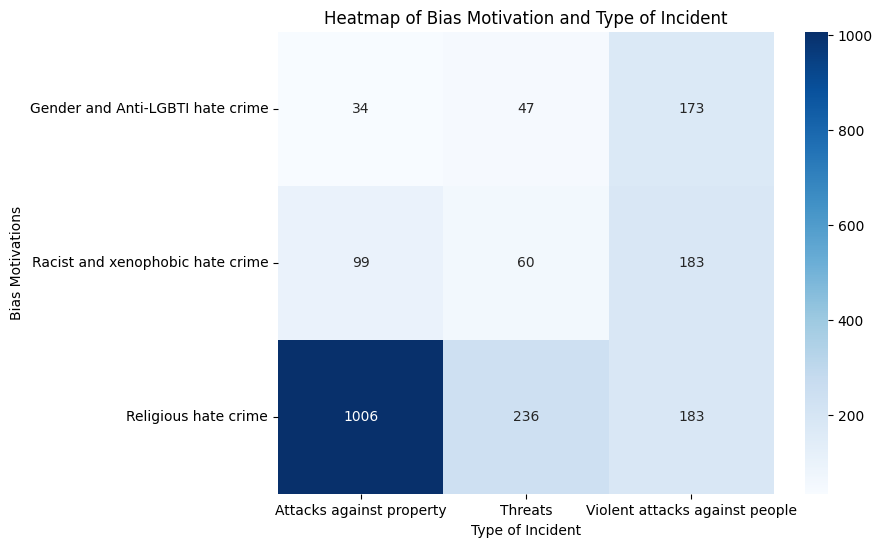

In [47]:
# Plot heatmap of the contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt="d")
plt.title("Heatmap of Bias Motivation and Type of Incident")
plt.xlabel("Type of Incident")
plt.ylabel("Bias Motivations")
plt.show()

here we can see that the groups that likely needing support are involded in case where theey physically in danger. Racist and gender. 

check the umbrela religious hate crime where we can see racist hate crime that are hidden

## Text Processing and analysis 

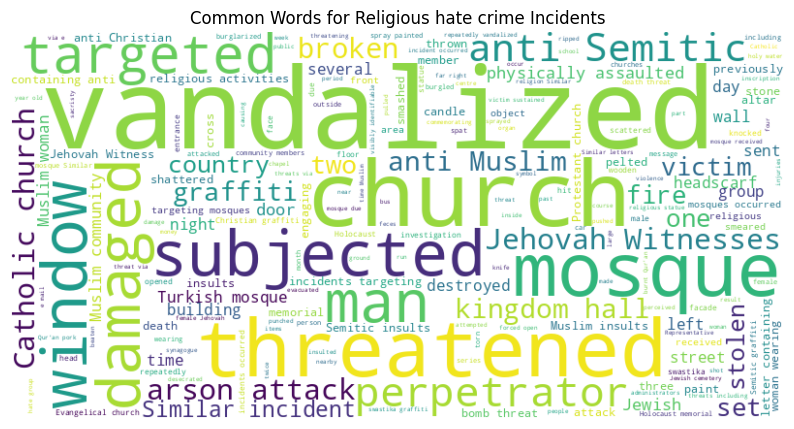

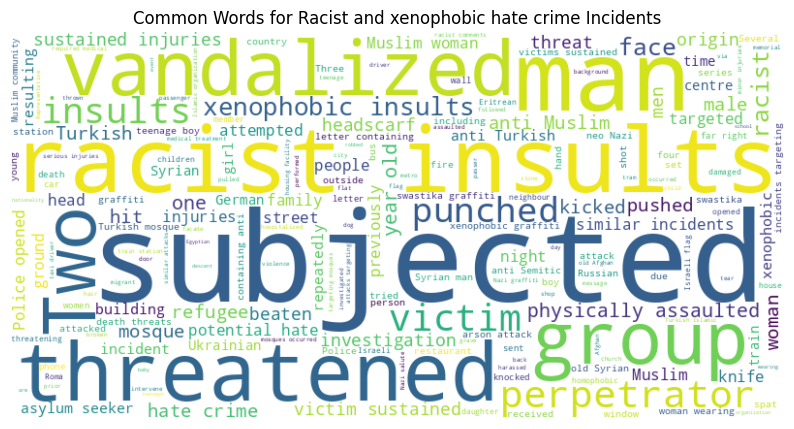

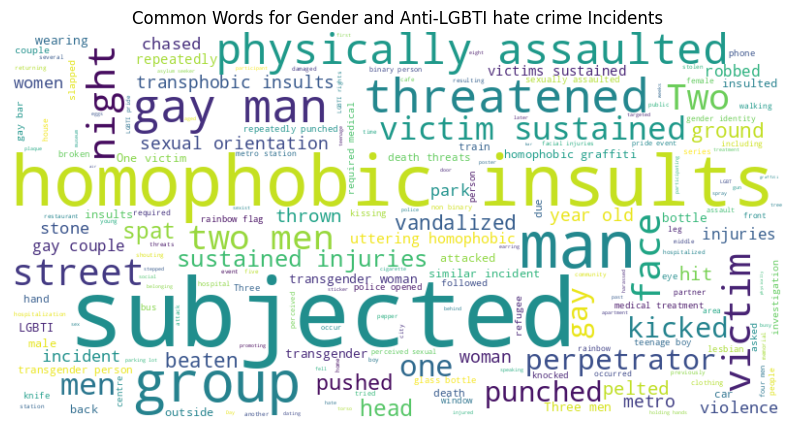

In [48]:


# Generate a word cloud for each bias motivation
for bias in df['Bias motivations'].unique():
    text = ' '.join(description for description in df[df['Bias motivations'] == bias]['Description'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Common Words for {bias} Incidents')
    plt.show()

In [52]:
df.head()

,Date,Country,Bias motivations,Type of incident,Source,Description,Year,Month
756,2016-03-01,Germany,Religious hate crime,Violent attacks against people,Department for Research and Information on Ant...,A group of Spanish tourists was spat at and su...,2016,3
757,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,Plates commemorating female Jewish students we...,2016,4
758,2016-04-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,A sticker denying the Holocaust was left on a ...,2016,4
759,2016-05-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Four stolpersteine, stones commemorating Holoc...",2016,5
760,2016-06-01,Germany,Religious hate crime,Attacks against property,Department for Research and Information on Ant...,"Several stolpersteine, stones commemorating Ho...",2016,6


## Sentiment analysis todo? 

In [49]:
# Vectorize descriptions by bias motivation
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Description'].fillna(''))
feature_names = tfidf.get_feature_names_out()

# Sum TF-IDF scores for each word for each bias motivation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Bias Motivation'] = df['Bias motivations'].values
tfidf_keywords = tfidf_df.groupby('Bias Motivation').sum().T

# Display the top keywords for each bias motivation
for bias in tfidf_keywords.columns:
    print(f"\nTop keywords for {bias}:")
    print(tfidf_keywords[bias].sort_values(ascending=False).head(10))


Top keywords for Gender and Anti-LGBTI hate crime:
homophobic    34.324469
man           28.036944
gay           27.237630
insults       24.689997
subjected     23.599637
men           17.430530
group         17.275602
assaulted     14.082117
physically    12.949750
victim        11.504079
Name: Gender and Anti-LGBTI hate crime, dtype: float64

Top keywords for Racist and xenophobic hate crime:
racist        27.308583
insults       23.767448
subjected     23.181166
xenophobic    20.387323
man           15.493390
muslim        13.733663
graffiti      13.460370
turkish       13.078366
vandalized    11.839590
woman         11.324566
Name: Racist and xenophobic hate crime, dtype: float64

Top keywords for Religious hate crime:
vandalized    90.244266
mosque        80.378995
church        71.159393
muslim        46.094035
anti          43.834098
graffiti      40.738142
threatened    33.895997
jehovah       29.357195
damaged       29.026475
targeted      27.059448
Name: Religious hate crime

In [50]:
# Vectorize to get bigrams and trigrams
vec = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vec.fit_transform(df['Description'].fillna(''))
ngram_df = pd.DataFrame(ngrams.toarray(), columns=vec.get_feature_names_out())

# Summing ngrams by bias motivation
ngram_df['Bias Motivation'] = df['Bias motivations'].values
bigram_summary = ngram_df.groupby('Bias Motivation').sum().T

# Display top bigrams or trigrams
for bias in bigram_summary.columns:
    print(f"\nCommon bigrams/trigrams for {bias}:")
    print(bigram_summary[bias].sort_values(ascending=False).head(10))


Common bigrams/trigrams for Gender and Anti-LGBTI hate crime:
homophobic insults              132
subjected homophobic            120
subjected homophobic insults    112
gay man                          55
physically assaulted             48
man subjected                    33
man subjected homophobic         31
victim sustained                 28
insults physically               23
sustained injuries               23
Name: Gender and Anti-LGBTI hate crime, dtype: int64

Common bigrams/trigrams for Racist and xenophobic hate crime:
subjected racist            98
racist insults              89
subjected racist insults    77
xenophobic insults          40
year old                    35
physically assaulted        35
subjected xenophobic        33
anti muslim                 31
hate crime                  25
sustained injuries          25
Name: Racist and xenophobic hate crime, dtype: int64

Common bigrams/trigrams for Religious hate crime:
church vandalized       131
mosque vandalized  

In [17]:

# Drop rows where 'Descriptions' is NaN
df = df.dropna(subset=['Description'])

# Group descriptions by bias motivations
grouped_descriptions = df.groupby('Bias motivations')['Description'].apply(list).reset_index(name='Description')

# Specify the file path for the output
output_file = '/Users/sayo/personal_projects/Usafe_bot/data/categorized_descriptions.txt'

# Open the file in write mode
with open(output_file, 'w') as file:
    # Loop through each row in the grouped DataFrame
    for index, row in grouped_descriptions.iterrows():
        # Write the bias motivation as a header
        file.write(f"Bias Motivations: {row['Bias motivations']}\n")
        file.write("Description:\n")
        
        # Write each description under the respective bias motivation
        for description in row['Description']:
            file.write(f"- {description}\n")
        
        # Add a blank line to separate categories
        file.write("\n")

print(f"Descriptions categorized by bias motivation have been saved to {output_file}")

Descriptions categorized by bias motivation have been saved to /Users/sayo/personal_projects/Usafe_bot/data/categorized_descriptions.txt


In [19]:
# Filter the dataframe to keep only the rows where the country is Germany
germany_df = df[df['Country'] == 'Germany']

# Drop rows where 'Descriptions' is NaN
germany_df = germany_df.dropna(subset=['Description'])

# Group descriptions by bias motivations
grouped_descriptions = germany_df.groupby('Bias motivations')['Description'].apply(list).reset_index(name='Description')

# Specify the file path for the output
output_file = '/Users/sayo/personal_projects/Usafe_bot/data/categorized_descriptions_germany.txt'

# Open the file in write mode
with open(output_file, 'w') as file:
    # Loop through each row in the grouped DataFrame
    for index, row in grouped_descriptions.iterrows():
        # Write the bias motivation as a header
        file.write(f"Bias Motivations: {row['Bias motivations']}\n")
        file.write("Description:\n")
        
        # Write each description under the respective bias motivation
        for description in row['Description']:
            file.write(f"- {description}\n")
        
        # Add a blank line to separate categories
        file.write("\n")

print(f"Descriptions categorized by bias motivation for Germany have been saved to {output_file}")

Descriptions categorized by bias motivation for Germany have been saved to /Users/sayo/personal_projects/Usafe_bot/data/categorized_descriptions_germany.txt
